# Chlorophyll A Data Vis Workbook

### Imports

In [1]:
%matplotlib inline
import scipy
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load & Format BGC Data

In [2]:
bgc_df = pd.read_csv("data/argo-isosurface-data.csv")
bgc_df.dropna(axis=1, how='all', inplace=True) # Remove unused columns
bgc_df.dropna(inplace=True) # Drop points missing chlorophyll values
bgc_df.drop_duplicates(inplace=True) # Drop duplicates (for some reason stations 1-9 like to duplicate)
bgc_df["Station Num"]=range(1,len(bgc_df)+1) # Add in column with station numbers
bgc_chl_a = "Integral_0 { Chlorophyll-A (original) } * d_Pressure (original) [mg m~^-~^3 * decibar] @ Pressure (original) [decibar]=20.0"
bgc_df[bgc_chl_a]=bgc_df[bgc_chl_a]/20. # Normalize chlorophyll data

bgc_df["Overall Day Num"] = bgc_df["Time [yr]"].astype(int) * 365 + bgc_df["Day of Year"] # Add in column with total days
bgc_df.head()

,Cruise,QV:ARGO,Station,QV:ARGO.1,Type,QV:ARGO.2,yyyy-mm-ddThh:mm:ss.sss,QV:ARGO.3,Longitude [degrees_east],QV:ARGO.4,...,QV:ARGO.5,QV:ODV:STATION,Dummy Var,Longitude,Latitude,Time [yr],Day of Year,Integral_0 { Chlorophyll-A (original) } * d_Pressure (original) [mg m~^-~^3 * decibar] @ Pressure (original) [decibar]=20.0,Station Num,Overall Day Num
1,5905108,0,1a_D_A_bio,0,C,0,2017-07-29T20:01:50,0,185.24200,0,...,0,1,0,185.242,-32.465,2017.57,210,0.598395,1,736415
3,5905108,0,2a_D_A_bio,0,C,0,2017-08-08T20:37:00,0,185.30000,0,...,0,1,0,185.300,-32.267,2017.60,220,0.628195,2,736425
5,5905108,0,3a_D_A_bio,0,C,0,2017-08-18T19:37:50,0,185.25600,0,...,0,1,0,185.256,-32.298,2017.63,230,0.415292,3,736435
7,5905108,0,4a_D_A_bio,0,C,0,2017-08-28T21:43:20,0,185.32600,0,...,0,1,0,185.326,-32.560,2017.66,240,0.514820,4,736445
9,5905108,0,5a_D_A_bio,0,C,0,2017-09-07T23:10:00,0,185.25101,0,...,0,1,0,185.251,-32.979,2017.68,250,0.363909,5,736455


### Load & Format Satellite Data

In [3]:
sat_data_dir = "data/satellite-data"

In [4]:
# Helper Functions
def loadSatelliteData(sat_data_dir):
    """Wrapper function for loading satellite data
    
    Args:
        sat_data_dir (str): string representing file location of all satellite data
    
    Returns:
        sat_df (DataFrame): pandas dataframe containing clean satellite data with chlA values
    """
    sat_df = pd.DataFrame()
    
    for f in glob.glob('%s/*.txt' % sat_data_dir): # Iterate through files in sat_data_dir
        year, day = parseFilenameDate(f)
        new_df = pd.read_csv(f, delimiter="\t",header=1)
        new_df["Time [yr]"] = int(year) # Add year to dataframe
        new_df["Day of Year"] = int(day) # Add day of year to dataframe
        sat_df = pd.concat([new_df, sat_df])
    
    sat_df.dropna(axis=1, how='all', inplace=True) #Remove unused columns
    sat_df.dropna(inplace=True) #Drop points missing chlorophyll values
    sat_df["Overall Day Num"] = sat_df["Time [yr]"].astype(int) * 365 + sat_df["Day of Year"] # Add in column with total days
    
    return sat_df

def parseFilenameDate(filename):
    """Parses satellite data filename for start date
    
    Args:
        filename (str): string representing filename
        
    Returns:
        year (int): year of data
        day (int): day of year of data
    """
    start_idx = filename.find("\V") + 2 #Each date starts with \V, and add 2 to move cursor over by /V
    year = filename[start_idx:start_idx + 4] #Year is 4 characters long 
    day = filename[start_idx + 4:start_idx + 7] #Day of year is 3 characters long

    return year, day

In [5]:
sat_df = loadSatelliteData(sat_data_dir)

In [6]:
sat_df.head()

,Cruise,QF,Station,QF.1,Type,QF.2,QF.3,Longitude [degrees_east],QF.4,Latitude [degrees_north],QF.5,QV:ODV:STATION,Dummy Var,Longitude,Latitude,Time [yr],Day of Year,chlor_a [mg m^-3] @ Dummy=first,Overall Day Num
0,V20172492017256.L3m_8D_SNPP_CHL.x_chlor_a.nc,1,1,1,B,1,1,180.02083,1,-20.02083,1,1,0,-179.979,-20.0208,2017,249,0.076766,736454
1,V20172492017256.L3m_8D_SNPP_CHL.x_chlor_a.nc,1,2,1,B,1,1,180.27083,1,-20.02083,1,1,0,-179.729,-20.0208,2017,249,0.074067,736454
2,V20172492017256.L3m_8D_SNPP_CHL.x_chlor_a.nc,1,3,1,B,1,1,180.52083,1,-20.02083,1,1,0,-179.479,-20.0208,2017,249,0.067281,736454
3,V20172492017256.L3m_8D_SNPP_CHL.x_chlor_a.nc,1,4,1,B,1,1,180.77083,1,-20.02083,1,1,0,-179.229,-20.0208,2017,249,0.063319,736454
4,V20172492017256.L3m_8D_SNPP_CHL.x_chlor_a.nc,1,5,1,B,1,1,181.02083,1,-20.02083,1,1,0,-178.979,-20.0208,2017,249,0.072604,736454


### Lookup Chl-A values
For each station in the BGC argo dataset, look up the nearest lat/long value within correct time period containing Chl-A data in the satellite dataset. Then create dataset to be plotted

In [7]:
# Save name of chl-a column for brevity
chl_a_sat = "chlor_a [mg m^-3] @ Dummy=first" 

In [64]:
# Helper Functions
def findNearestValue(lat, long, day_num, df):
    """Find satellite chl-A value for point closest to input point
    
    Args:
        lat (float): input latitude
        long (float): input longitude
        day_num (int): Overall day number of input point
        df (DataFrame): Pandas dataframe containing satellite data
    
    Returns:
        chl_A_value (float): chl-A value of nearest satellite data point
    """
    time_df = filterByTime(day_num, df)
    chl_A_value = findNearestPoint(lat, long, time_df)
    
    # TODO: Remove this
#     try:
#     print("DEBUG")
#     print(time_df)
    return chl_A_value
#     except:
#         return None
    
    
def filterByTime(day_num, df):
    """Filter dataframe for only applicable time periods.
    
    Assumes satellite data has a column containing the first day number of 
    the time period it covers. We want to filter for the time period during which 
    the point was taken, so we want to find the closest day number in the dataset that 
    isn't larger than the input day number
    
    Args:
        day_num (int): Overall day number of input point
        df (DataFrame): Pandas dataframe containing satellite data
        
    Returns:
        time_df (DataFrame): Pandas dataframe containing time-filtered satellite data
    """
    # Find last satellite day number that is less than input day number
    closest_day = df["Overall Day Num"][day_num - df["Overall Day Num"] >=0].max()
    # Create bool array with values we want to keep and use it to filter out irrelevant timeframes
    time_df = df[df["Overall Day Num"]==closest_day]
    
    return time_df

def findNearestPoint(lat, long, df):
    """ Finds approximate nearest point - first searches latitude, 
    then searches longitude
    
    Doesn't truly find nearest point because that would be more complicated 
    but unneccessary since I'm assuming the data is rather grid-like
    
    Args:
        lat (float): Latitude of point to find in grid
        long (float): Longitude of point to find in grid
        df (DataFrame): pandas dataframe containing grid of satellite points
        
    Returns:
        nearest_chl_a (float): nearest Chl-A value
    """
    
    lats = df["Latitude [degrees_north]"]

    nearest_lat_error = abs(lats-lat).min() # Compute error for nearest latitude point
    nearest_lat_idxs = abs(lats-lat) == nearest_lat_error # Create bool array where latitude matches
    lat_sat_df = df[nearest_lat_idxs] # Use bool array to filter for matching latitude
#     print("DEBUGGING HREE")
#     print(lat_sat_df)

    longs = lat_sat_df["Longitude [degrees_east]"] # Only look at longitude
    nearest_long_error = abs(longs-long).min()
    nearest_long_idxs = abs(longs-long) == nearest_long_error
#     print("DEBUGGING HREE")
#     print(nearest_long_idxs)


    nearest_pt = lat_sat_df[nearest_long_idxs][chl_a_sat]
    
    print("DEBUGGING HREE")
    print(nearest_long_idxs)
    print("Length:")
    print(len(nearest_long_idxs))
    print(lat_sat_df)
    print(nearest_pt)
    return nearest_pt

In [65]:
sat_df["Overall Day Num"].unique()

array([736454, 736438, 736430], dtype=int64)

In [66]:
# Checking filterByTime function
filterByTime(736429, sat_df)["Overall Day Num"].unique() # Case where date is too early
filterByTime(736438, sat_df)["Overall Day Num"].unique() # Case where date is right on the dot
filterByTime(736440, sat_df)["Overall Day Num"].unique() # Case where date is in middle
filterByTime(736460, sat_df)["Overall Day Num"].unique() # Case where date is past last timestamp

# TODO: Decide how to handle dates out of range - to find closest or drop value?

array([736454], dtype=int64)

In [67]:
# Checking findNearestPoint
findNearestValue(-31.509, 180.895, 736685, sat_df)
# print(findNearestValue(-31.509, 180.895, 736685, sat_df).dropna())

DEBUGGING HREE
66240    False
66241    False
66242    False
66244     True
66245    False
66246    False
66247    False
66248    False
66249    False
66250    False
66251    False
66252    False
66253    False
66254    False
66255    False
66256    False
66257    False
66258    False
66259    False
66260    False
66261    False
66262    False
66263    False
66264    False
66265    False
66266    False
66267    False
66268    False
66269    False
66271    False
         ...  
67645    False
67646    False
67647    False
67648    False
67649    False
67650    False
67651    False
67652    False
67653    False
67654    False
67655    False
67659    False
67660    False
67661    False
67662    False
67663    False
67664    False
67665    False
67666    False
67667    False
67668    False
67669    False
67670    False
67673    False
67674    False
67675    False
67676    False
67677    False
67678    False
67679    False
Name: Longitude [degrees_east], Length: 913, dtype: bool
Length:
913
 

66244    0.248396
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64

### Create Compiled Dataset

In [14]:
# TODO: Find a better data structure for this

compiled_df = pd.DataFrame(columns=["Station Num", "Overall Day Num", "BGC Lat", "BGC Long", "BGC Chl-A", "Sat Chl-A"])
station_num_lt = []
day_num_lt = []
bgc_lat_lt = []
bgc_long_lt = []
bgc_chl_lt = []
sat_chl_lt = []


for i in range(0,len(bgc_df)): # For each station in BGC dataset
    stn = bgc_df.iloc[i]
    station_num_lt.append(stn["Station Num"])
    day_num_lt.append(stn["Overall Day Num"])
    bgc_lat_lt.append(stn["Latitude [degrees_north]"])
    bgc_long_lt.append(stn["Longitude [degrees_east]"])
    bgc_chl_lt.append(stn[bgc_chl_a])
    #print(findNearestValue(stn["Latitude [degrees_north]"], stn["Longitude [degrees_east]"], stn["Overall Day Num"], sat_df))
    sat_chl_lt.append(findNearestValue(stn["Latitude [degrees_north]"], stn["Longitude [degrees_east]"], stn["Overall Day Num"], sat_df))
    
    print("Station: " + str(i))
    output = findNearestValue(stn["Latitude [degrees_north]"], stn["Longitude [degrees_east]"], stn["Overall Day Num"], sat_df)
    print(stn["Latitude [degrees_north]"])
    print(stn["Longitude [degrees_east]"])
    print(stn["Overall Day Num"])
    print(output)
    
compiled_df["Station Num"] = station_num_lt
compiled_df["Overall Day Num"] = day_num_lt
compiled_df["BGC Lat"] = bgc_lat_lt
compiled_df["BGC Long"] = bgc_long_lt
compiled_df["BGC Chl-A"] = bgc_chl_lt
compiled_df["Sat Chl-A"] = sat_chl_lt
               


               






Station: 0
-32.465
185.242
736415
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 1
-32.267
185.3
736425
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 2
-32.298
185.256
736435
70581    0.216514
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 3
-32.56
185.326
736445
72021    0.189774
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 4
-32.979
185.25101
736455
74901    0.184411
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:73: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Station: 5
-33.327
185.05499
736465
76340    0.155826
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 6
-33.478
185.017
736475
77780    0.143301
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 7
-33.432
185.161
736485
77781    0.213547
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 8
-33.103
185.45799
736495
74902    0.187496
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 9
-32.494
185.478
736505
72022    0.208158
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 10
-31.907
185.108
736515
69140    0.208051
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 11
-31.564
184.883
736525
66259    0.174903
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 12
-31.394
184.89301
736535
64819    0.188665
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 13
-31.521
184.87801
736545
66259    0.174903
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 14
-31.627
184.718
736555

-41.177
181.203
737234
122405    0.22099
Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64
Station: 83
-41.526
181.616
737244
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 84
-41.881
182.274
737254
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 85
-41.916
183.632
737264
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 86
-42.025
184.88901
737274
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 87
-42.072
185.48199
737284
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 88
-42.033
185.936
737294
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 89
-41.869
186.269
737304
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 90
-41.677
186.606
737314
Series([], Name: chlor_a [mg m^-3] @ Dummy=first, dtype: float64)
Station: 91
-41.507
186.826
737324
123867    0.20539
Name: chlor_a [mg m^-3] @ Dummy=first, d

### Plot Data
Objective: Create a plot that quantifies error between different Chl-A sensors

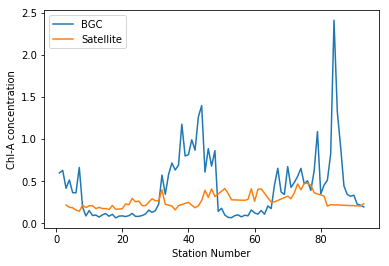

In [55]:
# TODO: Make this object-oriented
plt.plot(compiled_df["Station Num"], compiled_df["BGC Chl-A"])



# TODO: make this better 
# TODO: Debug misc NaN values
# TODO: Finish converting .nc to .txt files
# compiled_df["Sat Chl-A"]
compile2 = compiled_df.dropna()
plt.plot(compile2["Station Num"], compile2["Sat Chl-A"])
# compile2

plt.xlabel("Station Number")
plt.ylabel("Chl-A concentration")
plt.legend(["BGC", "Satellite"])